In [2]:
import time
import matplotlib.pyplot as plt
import pandas as pd

import rlcache.utils.visualiser as viz
plt.close('all')
%matplotlib inline
%load_ext autoreload
%autoreload 2

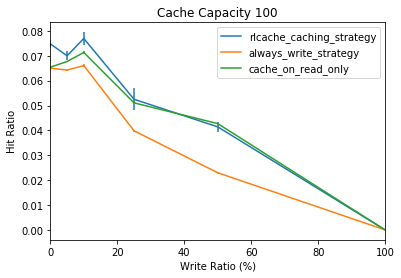

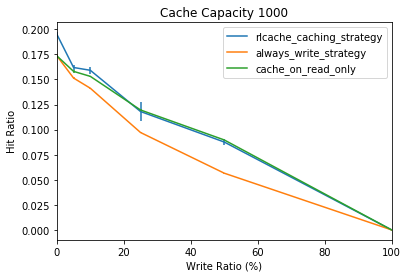

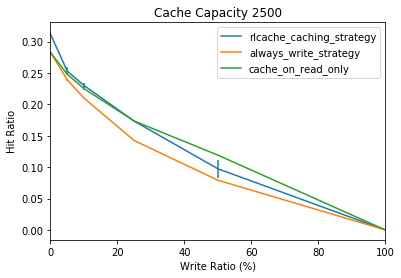

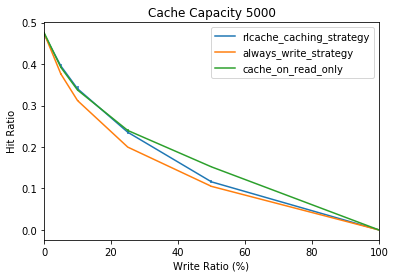

In [11]:
viz.save_everything_hit_rate('results',
                             ['rl_caching_strategy', 
                              'simple_strategy',
                              # 'random_caching',
                              'simple_strategy_read_only'
                              ],
                             'plots/caching_strategy',
                             overwrite_cols={
                                 'rl_caching_strategy': 'rlcache_caching_strategy',
                                 'simple_strategy': 'always_write_strategy',
                                 'random_caching': 'random_agent',
                                'simple_strategy_read_only': 'cache_on_read_only'
                             })

/home/samialab/Projects/rlcache/rlcache/utils/visualiser.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_should_cache[i] = (df_should_cache[i] - df_should_cache[i - 1]).item()
/home/samialab/Projects/rlcache/rlcache/utils/visualiser.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_should_not_cache[i] = (df_should_not_cache[i] - df_should_not_cache[i - 1]).item()
/home/samialab/Projects/rlcache/rlcache/utils/visualiser.py:168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

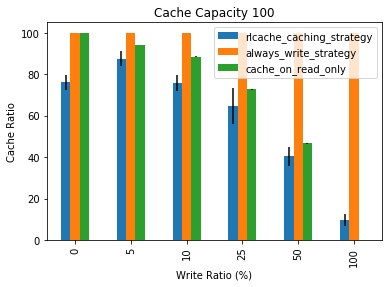

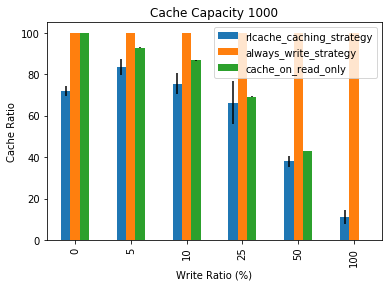

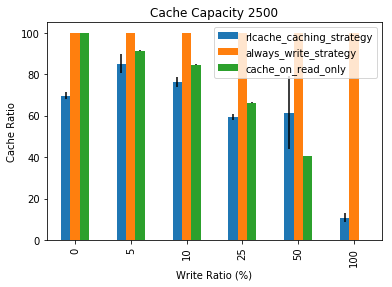

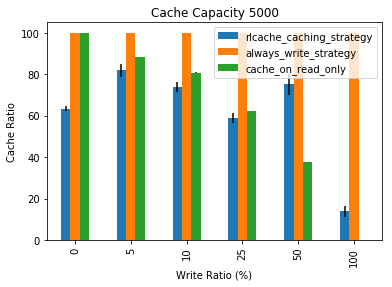

In [8]:

viz.save_everything_cache_rate('results',
                             ['rl_caching_strategy', 
                              'simple_strategy',
                              # 'random_caching',
                              'simple_strategy_read_only'
                              ],
                             'plots/caching_strategy',
                             overwrite_cols={
                                 'rl_caching_strategy': 'rlcache_caching_strategy',
                                 'simple_strategy': 'always_write_strategy',
                                 'random_caching': 'random_agent',
                                'simple_strategy_read_only': 'cache_on_read_only'
                             })


(0         0.145333
 1000      0.255333
 2000      0.283667
 3000      0.340000
 4000      0.353667
 5000      0.401000
 6000      0.407667
 7000      0.434667
 8000      0.337333
 9000      0.018000
 10000     0.102333
 11000     0.308000
 12000     0.349667
 13000     0.368667
 14000     0.413000
 15000     0.447333
 16000     0.467667
 17000     0.496333
 18000     0.331333
 19000     0.231667
 20000     0.220333
 21000     0.339667
 22000     0.443000
 23000     0.467667
 24000     0.505000
 25000     0.517667
 26000     0.457000
 27000     0.382333
 28000     0.288667
 29000     0.408667
             ...   
 92000     0.516000
 93000     0.501667
 94000     0.509667
 95000     0.489000
 96000     0.511333
 97000     0.501333
 98000     0.522667
 99000     0.521667
 100000    0.531667
 101000    0.502667
 102000    0.499000
 103000    0.509667
 104000    0.530333
 105000    0.521333
 106000    0.488000
 107000    0.483333
 108000    0.511333
 109000    0.504000
 110000    0.499000


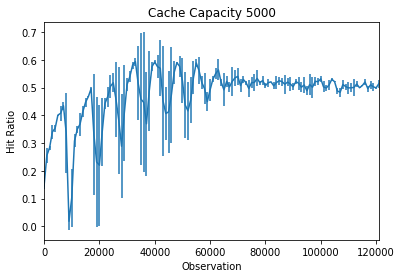

In [12]:
viz.save_zoomed_hit_rate('results/rl_caching_strategy', 'plots/caching_strategy', 5000)


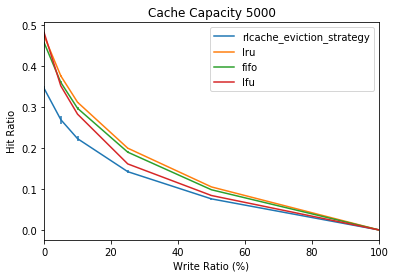

In [7]:
viz.save_everything_hit_rate('results',
                             ['rl_eviction_strategy', 
                              'simple_strategy',
                              'simple_strategy_fifo',
                              'simple_strategy_lfu'
                              ],
                             'plots/eviction_strategy',
                             overwrite_cols={
                                 'rl_eviction_strategy': 'rlcache_eviction_strategy',
                                 'simple_strategy': 'lru',
                                'simple_strategy_fifo': 'fifo',
                                 'simple_strategy_lfu': 'lfu'
                             })

In [155]:

stats_df = pd.read_csv(f'results/rl_caching_strategy/cache_capacity_5000/2019_05_17_12_54/evaluation_logger.log',
                   names=['timestamp', 'key', 'observation', 'episode'],
                   usecols=['episode', 'observation', 'key'])
stats = stats_df.groupby([(stats_df.index // 10000), 'episode', 'observation']).count().unstack(0)['key'].fillna(0).transpose()
# hit_ratio_all = stats['Hit'] / stats.sum(axis=1)
# stats.plot()

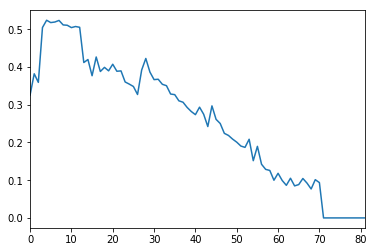

In [205]:
results = (stats[1]['Hit']/stats[1].sum(axis=1))
results = results.fillna((stats[2]['Hit']/stats[2].sum(axis=1)))
results = results.fillna((stats[3]['Hit']/stats[3].sum(axis=1)))
results = results.fillna((stats[4]['Hit']/stats[4].sum(axis=1)))
results = results.fillna((stats[5]['Hit']/stats[5].sum(axis=1)))
results = results.fillna(0)
results.plot()

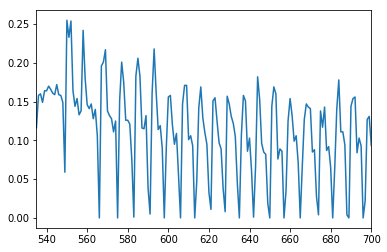

In [273]:
test_learning = stats_df.groupby([(stats_df.index // 1000), 'episode', 'observation']).count().unstack(0)['key'].fillna(0).transpose()
# test_learning.index
(test_learning[5]['Hit']/test_learning[5].sum(axis=1)).dropna().plot()


In [117]:
end_of_episode_stats_df = pd.read_csv(f'results/rl_caching_strategy/cache_capacity_5000/2019_05_17_12_54/end_of_episode_logger.log',
                   names=['timestamp', 
                          'episode_num',
                          'invalidate', 
                          'hit', 
                          'miss', 
                          'hit_ratio', 
                          'should_cache', 
                          'should_not_cache', 
                          'should_cache_ratio', 
                          'manual_evicts', 
                          'cache_utility'])


end_of_episode_stats_df['should_cache'][6] - end_of_episode_stats_df['should_cache'][5] 




10740

In [116]:
end_of_episode_stats_df = pd.read_csv(f'results/random_caching/cache_capacity_5000/2019_05_24_16_42/end_of_episode_logger.log',
                   names=['timestamp', 'episode_num',
                          'invalidate', 'hit', 
                          'miss', 'hit_ratio', 
                          'should_cache', 
                          'should_not_cache', 
                          'should_cache_ratio', 
                          'manual_evicts', 
                          'cache_utility'],
                      usecols=['should_cache', 'should_not_cache'])
end_of_episode_stats_df


,should_cache,should_not_cache
0,0,0
1,19436,19327
2,22582,22466
3,26599,26212
4,33510,33379
5,40494,40434
6,50089,49911


In [207]:
end_of_episode_stats_df

,timestamp,episode_num,invalidate,hit,miss,hit_ratio,should_cache,should_not_cache,should_cache_ratio,manual_evicts,cache_utility
0,2019-05-17 12:55:49,0,0,0,0,0.000000,0,0,0.000000,0,0.0000
1,2019-05-17 13:26:55,1,0,58004,41996,58.004000,27172,14824,64.701400,4553,0.9994
2,2019-05-17 13:59:22,2,0,112269,82565,57.622899,66077,21654,75.317733,27829,0.9996
3,2019-05-17 14:37:38,3,159,159812,125091,56.093477,103350,36838,73.722430,52511,0.9996
4,2019-05-17 15:25:36,4,549,192588,167377,53.501868,141016,66396,67.988352,76027,1.0000
5,2019-05-17 16:19:53,5,930,211250,198456,51.561364,205749,83001,71.255065,109791,0.9296
6,2019-05-17 17:04:58,6,1075,211250,198456,51.561364,216489,172261,55.688489,117356,0.9942


In [255]:
end_of_episode_stats_df_siple = pd.read_csv(f'results/simple_strategy/cache_capacity_5000/2019_05_18_11_15/end_of_episode_logger.log',
                   names=['timestamp', 'episode_num',
                          'invalidate', 'hit', 
                          'miss', 'hit_ratio', 
                          'should_cache', 
                          'should_not_cache', 
                          'should_cache_ratio', 
                          'manual_evicts', 
                          'cache_utility'])

In [210]:

cache_utilisation_df =  pd.read_csv(f'results/simple_strategy/cache_capacity_5000/2019_05_18_11_15/caching_strategy/read_write_caching_strategy_entry_hits_logger.log',
                   names=['timestamp', 'episode_num',
                          'user', 'hit'])

In [239]:
cache_utilisation_df.groupby(['episode_num']).sum()

,hit
episode_num,
1,42870
2,52203
3,47387
4,41074
5,24942
6,8755


In [218]:
cache_utilisation_df_rl =  pd.read_csv(f'results/rl_caching_strategy/cache_capacity_5000/2019_05_17_12_54/caching_strategy/rl_caching_strategy_entry_hits_logger.log',
                   names=['timestamp', 'episode_num',
                          'user', 'hit'])

In [256]:
test = cache_utilisation_df_rl.groupby(['episode_num']).sum().unstack(0)
test['hit']/end_of_episode_stats_df['should_cache']

0         NaN
1    0.609819
2    0.378150
3    0.172143
4    0.082388
5    0.032292
6    0.000000
dtype: float64

In [257]:

test_2  = cache_utilisation_df.groupby(['episode_num']).sum().unstack(0)
test_2['hit']/end_of_episode_stats_df_siple['should_cache']



0         NaN
1    1.152512
2    0.631272
3    0.350939
4    0.203499
5    0.088206
6    0.022873
dtype: float64

In [275]:

viz.calculate_hitrate_on_varying_capacity('results/rl_ttl_strategy')

ValueError: Length mismatch: Expected axis has 7 elements, new values have 6 elements

In [92]:

stats_df = pd.read_csv(f'results/rl_caching_strategy/cache_capacity_5000/2019_05_17_12_54/evaluation_logger.log',
                   names=['timestamp', 'key', 'observation', 'episode'],
                   usecols=['episode', 'observation', 'key'])
# stats = stats_df.groupby(['episode', 'observation', (stats_df.index // 10000)]).count().unstack(0)['key'].fillna(0).transpose()
# hit_ratio_all = stats['Hit'] / stats.sum(axis=1)
stats = stats_df.groupby([(stats_df.index // 1000), 'episode', 'observation']).count().unstack(0)['key'].fillna(0).transpose()


In [15]:

# (stats['Hit'] / 10000).quantile(0.95,axis=1)


episode
1    0.51470
2    0.40325
3    0.36710
4    0.26750
5    0.12725
6    0.00000
Name: 0.95, dtype: float64

In [90]:
stats_df = pd.read_csv(f'results/random_caching/cache_capacity_5000/2019_05_24_16_42/evaluation_logger.log',
                   names=['timestamp', 'key', 'observation', 'episode'],
                   usecols=['episode', 'observation', 'key'])
stats = stats_df.groupby([(stats_df.index // 1000), 'episode', 'observation']).count().unstack(0)['key'].fillna(0).transpose()

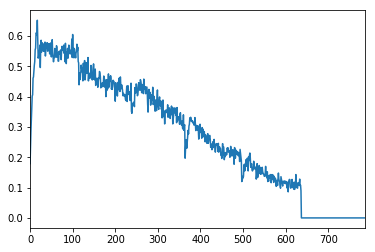

In [91]:


results = (stats[1]['Hit']/stats[1].sum(axis=1))
results = results.fillna((stats[2]['Hit']/stats[2].sum(axis=1)))
results = results.fillna((stats[3]['Hit']/stats[3].sum(axis=1)))
results = results.fillna((stats[4]['Hit']/stats[4].sum(axis=1)))
results = results.fillna((stats[5]['Hit']/stats[5].sum(axis=1)))
results = results.fillna(0)
results.plot()

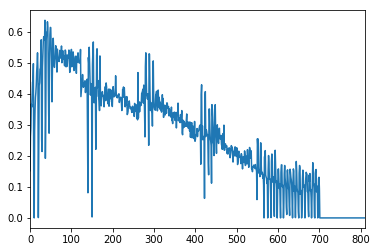

In [93]:

results = (stats[1]['Hit']/stats[1].sum(axis=1))
results = results.fillna((stats[2]['Hit']/stats[2].sum(axis=1)))
results = results.fillna((stats[3]['Hit']/stats[3].sum(axis=1)))
results = results.fillna((stats[4]['Hit']/stats[4].sum(axis=1)))
results = results.fillna((stats[5]['Hit']/stats[5].sum(axis=1)))
results = results.fillna(0)
results.plot()

Text(0.5, 1.0, 'Cache Capacity 5000 learning.')

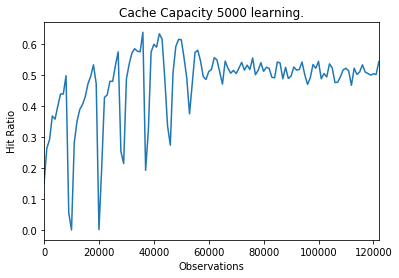

In [88]:

zoomed_stats = (stats[1]['Hit']/stats[1].sum(axis=1)).dropna()
zoomed_stats.index = zoomed_stats.index * 1000
ax = zoomed_stats.plot()
ax.set_xlabel('Observations')
ax.set_ylabel('Hit Ratio')
ax.set_title(f'Cache Capacity 5000 learning.')


In [89]:
fig = ax.get_figure()
fig.savefig(f'plots/caching_strategy/hitrate_zoomed_5000.pdf')


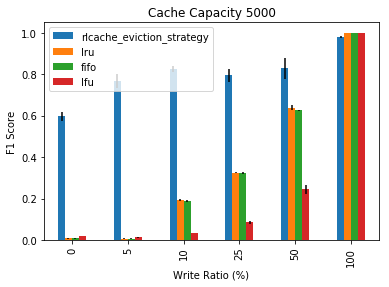

In [6]:

viz.save_everything_f1('results',
                             ['rl_eviction_strategy', 
                              'simple_strategy',
                              'simple_strategy_fifo',
                              'simple_strategy_lfu'
                              ],
                             'plots/eviction_strategy',
                             overwrite_cols={
                                 'rl_eviction_strategy': 'rlcache_eviction_strategy',
                                 'simple_strategy': 'lru',
                                'simple_strategy_fifo': 'fifo',
                                 'simple_strategy_lfu': 'lfu'
                             })

/home/samialab/Projects/rlcache/rlcache/utils/visualiser.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_should_cache[i] = (df_should_cache[i] - df_should_cache[i - 1]).item()
/home/samialab/Projects/rlcache/rlcache/utils/visualiser.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_should_not_cache[i] = (df_should_not_cache[i] - df_should_not_cache[i - 1]).item()
/home/samialab/Projects/rlcache/rlcache/utils/visualiser.py:168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

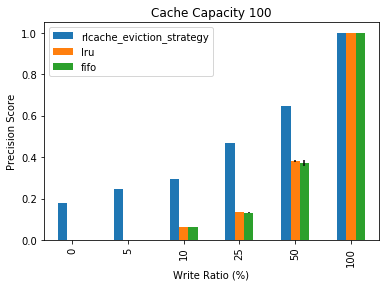

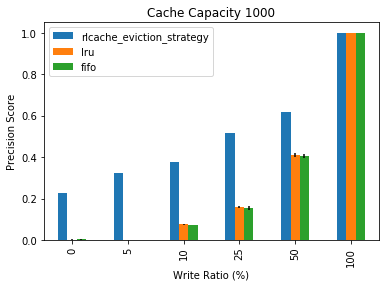

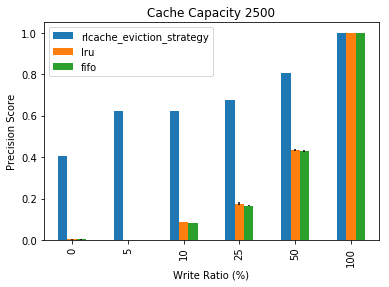

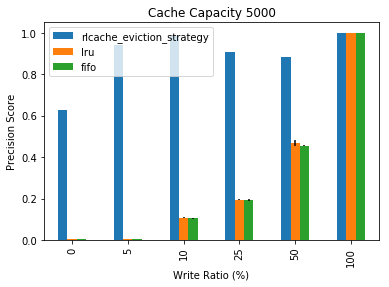

In [83]:

viz.save_everything_f1('results',
                             ['rl_eviction_strategy', 
                              'simple_strategy',
                              'simple_strategy_fifo'
                              ],
                             'plots/eviction_strategy',
                             overwrite_cols={
                                 'rl_eviction_strategy': 'rlcache_eviction_strategy',
                                 'simple_strategy': 'lru',
                                'simple_strategy_fifo': 'fifo'
                             },metric='precision')

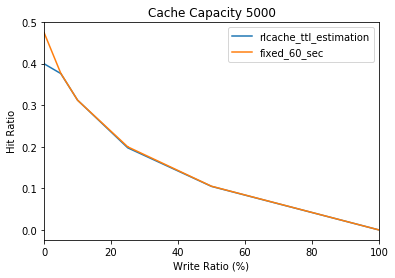

In [5]:


viz.save_everything_hit_rate('results',
                             ['rl_ttl_strategy', 
                              'simple_strategy'],
                             'plots/ttl_strategy',
                             overwrite_cols={'simple_strategy': 'fixed_60_sec', 
                                             'rl_ttl_strategy': 'rlcache_ttl_estimation'})

In [3]:


eval_logger = pd.read_csv(f'results/rl_caching_strategy/cache_capacity_5000/2019_05_28_08_21/evaluation_logger.log',
                               names=['timestamp', 'key', 'observation', 'episode'])

In [5]:
eval_logger.to_pickle('results/rl_caching_strategy/cache_capacity_5000/2019_05_28_08_21/eval_logger.pkl')

